<img src='../img/logo.png' alt='DS Market logo' height='150px'>

# DS Market Sales Report and Analysis

## Table of Contents

* [A. Introduction](#introduction)
* [B. Importing Libraries](#libraries)
* [C. Importing data](#data)
* [MLC 2: Data understanding](#data_understanding)
    * [MLC 2.1.: Univariate data analysis](#univariate_data_analysis)
        * [2.1.1  Dataset size](#dataset_size)
        * [2.1.2. Direct visualization of the data](#visualization)
        * [2.1.3. Types of variables available](#variable_types)
        * [2.1.4. Descriptive statistics](#descriptive_statistics)
        * [2.1.5. Null values](#nulls)
        * [2.1.6. Identification of outliers](#outliers_identification)
        * [2.1.7. Identification of errors in the data](#errors) 
        * [2.1.8. Visualization of distributions](#data_distributions) 

## A. Introduction <a class="anchor" id="introduction"></a>

DS Market (previously known as TradiStores) is a small chain of shopping centres across the USA that has found itself amongst the very latecomers to the digital transformation that has been reshaping the retail sector for a quite few years. The company's change of name is only the first step of a disruptive five years plan to completely remodel each single process within the company. This new strategy has made the company incorporate a new Chief Digital Officer to help the company lead their decisions based on the huge amount of data available.

Until now, sales predictions have always been done using rudimentary approaches, and the margins of error obtained, are affecting many areas of the company. The magnitude of these errors stopped being acceptable a long time ago. In addition, many of the internal processed within the company (stock estimations, prices optimization, deliveries, stockout predictions...) are very manual processed with a strong dependence on business experience, and their optimizations using AI methods has been included as part of the 5-year digital transformation plan.

In this notebook, the idea is to get the current picture of DS Market. We are going to explore all the available data the company can share and do an initial analysis on the following. We will analyse the data from NY, Boston and Philadelphia to:
- Check what products are popular and which ones are not so popular anymore
- If these vary across cities and/or stores
- If these vary in prices

With that, the marketing department will take actions to exploit these differences.

## B. Importing Libraries <a class="anchor" id="libraries"></a>

In [166]:
# system and path management
import sys
sys.path.append('../scripts') # including helper functions inside the scripts folder

# removing system warnings
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# plotting options
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 7)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format

# helper functions
import outlier_management as outliers
import plotting

## C. Importing Data <a class="anchor" id="data"></a>

In [12]:
folder_path = '../data/original/' 

sales = pd.read_csv(folder_path + 'item_sales.csv')
prices = pd.read_csv(folder_path + 'item_prices.csv')
calendar = pd.read_csv(folder_path + 'daily_calendar_with_events.csv')

In the following sections of this notebook we'll analyse and understand the data that was given to us, plus we will take advantage to clean and process part of the data if needed for as soon as we need to start creating and training future models.

## MLC 2: Data Understanding <a class="anchor" id="data_understanding"></a>

In the following section we will analyse each dataset separately and see what we are dealing with.

### MLC 2.1.: Univariate data analysis <a class="anchor" id="univariate_data_analysis"></a>

#### 2.1.1. Dataset sizes <a class="anchor" id="dataset_size"></a>

#### `Sales`

In [21]:
sales.shape

(30490, 1920)

#### `Prices`

In [22]:
prices.shape

(6965706, 5)

#### `Calendar`

In [23]:
calendar.shape

(1913, 5)

#### 2.1.2. Direct visualization of the data <a class="anchor" id="visualization"></a>

#### `Sales`

In [24]:
sales.columns

Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'd_1', 'd_2', 'd_3',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1920)

In [25]:
sales.head(5)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,2,2,0,0,0,1,1,0,2,0,1,1,2,0,1,0,0,0,2,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,

Each row in the `sales` dataframe represents the sales of a specific item in a specific store. It also has the amount of sales per day in several columns for each item (represented as `d_X`) So, in the dataframe we have all items available and its related sales.

The dataframe has the following data columns:

| Name        | Description                                               |
|-------------|-----------------------------------------------------------|
| id          | Sales Series id (combination of item + store_code)        |
| item        | Product ID                                                |
| category    | Product Category                                          |
| department  | Department ID (different identifier for different stores) |
| store       | Store Name                                                |
| store_code  | Store ID                                                  |
| region      | Sales Region                                              |
| d_1, d_2... | Number of units sold per day (d_X represents each day)    |

#### `Prices`

In [26]:
prices.columns

Index(['item', 'category', 'store_code', 'yearweek', 'sell_price'], dtype='object')

In [27]:
prices.head(5)

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,328.00",12.74
1,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,329.00",12.74
2,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,330.00",10.99
3,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,331.00",10.99
4,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,332.00",10.99


Each row in the `prices` dataframe provides the `sell_price`, in each store, per `yearweek`. This should allow us to be able to convert the number of items sold into income in $, as the price changes every week.

The dataframe has the following data columns:

| Name       | Description                                                                                                                                                                              |
|------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| item       | Product ID                                                                                                                                                                               |
| category   | Product Category                                                                                                                                                                         |
| store_code | Alphanumeric code of the store                                                                                                                                                           |
| yearweek   | Date period for the price (year-week format)                                                                                                                                             |
| sell_price | Price for the product "item" for the period in "yearweek".  Prices are provided per week (average across 7 days). If not available, there were no sales for the product during that week |

#### `Calendar`

In [28]:
calendar.columns

Index(['date', 'weekday', 'weekday_int', 'd', 'event'], dtype='object')

In [29]:
calendar.head(5)

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


Each row in `calendar` provides a translation to what `d_x` is to an understandable date and time. It also has information about the holidays.

The dataframe has the following data columns:

| Name        | Description                                                                               |
|-------------|-------------------------------------------------------------------------------------------|
| date        | Date in YYYY-mm-dd format                                                                 |
| weekday     | Day of the week                                                                           |
| weekday_int | Numeric day of the week starting in Saturday (Saturday = 1, Friday = 7)                   |
| d           | Day identifier in the form of d_X                                                         |
| event       | If the date includes an event, this is the name of the event (it has some missing values) |

In the end, the 3 dataframes are related between themselves in the following way:

<img src='../img/data_schema.png' alt='Tables schema and relationships' height='720px'>

By looking at the database schema, we see that there are some columns related to each other that will relate with or complement the set of features we will be able to create to feed each one of the models, but we need to be careful on the meaning of each one of the rows in each dataframe.

#### 2.1.3. Types of variables available <a class="anchor" id="variable_types"></a>

Let's check the types of variables available in the dataframes.

#### `Sales`

In [32]:
sales.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 1920 columns):
 #     Column      Dtype 
---    ------      ----- 
 0     id          object
 1     item        object
 2     category    object
 3     department  object
 4     store       object
 5     store_code  object
 6     region      object
 7     d_1         int64 
 8     d_2         int64 
 9     d_3         int64 
 10    d_4         int64 
 11    d_5         int64 
 12    d_6         int64 
 13    d_7         int64 
 14    d_8         int64 
 15    d_9         int64 
 16    d_10        int64 
 17    d_11        int64 
 18    d_12        int64 
 19    d_13        int64 
 20    d_14        int64 
 21    d_15        int64 
 22    d_16        int64 
 23    d_17        int64 
 24    d_18        int64 
 25    d_19        int64 
 26    d_20        int64 
 27    d_21        int64 
 28    d_22        int64 
 29    d_23        int64 
 30    d_24        int64 
 31    d_25        int64 
 32  

Each `object` in the dataframe represents a `string`, and then, we can see that there are the `d_x` fields which are numerical and representing the amount of sales for each item.

At this point, it might be interesting to check how many days we have encoded there and at some point compare with the ones in `calendar` to see if the data is complete.

In [46]:
# getting the list of numbers in the d_x columns
sales_days_list = [int(dx.split('_')[1]) for dx in sales.columns[7:]]
calendar_days_list = [int(dx.split('_')[1]) for dx in calendar.d] 

assert sales_days_list == calendar_days_list

It seems that the amount of days is right with what we have in both `sales` and `calendar`. No need to worry about that.

#### `Prices`

In [49]:
prices.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


Each `object` in the dataframe represents a `string`, and then we have 2 numerical values, for which, `yearweek` seems to have an inappropriate type `float64` that could be an `int`.

In [68]:
# checking if yearweek is, in fact an integer by looking if all numbers end up with '.0'
prices.yearweek.astype('str').str[-2:].value_counts()

.0    6721786
an     243920
Name: yearweek, dtype: int64

All non null values end up with '.0', so we are dealing with integers. When transforming the data, this is something we'll need to correct.

#### `Calendar`

In [70]:
calendar.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


`date` is of type `object` when it should be a `datetime`, but all other fields are Ok as they are. Columns of type `object` are `strings` and the only numerical number is an integer.

#### 2.1.4. Descriptive statistics <a class="anchor" id="descriptive_statistics"></a>

#### `Sales`

##### Categorical variables

In [73]:
sales.describe(include = 'object').T

,count,unique,top,freq
id,30490,30490,ACCESORIES_1_001_NYC_1,1
item,30490,3049,ACCESORIES_1_001,10
category,30490,3,SUPERMARKET,14370
department,30490,7,SUPERMARKET_3,8230
store,30490,10,Greenwich_Village,3049
store_code,30490,10,NYC_1,3049
region,30490,3,New York,12196


Some interesting insights from this:
- There are only 10 different stores (given by the number of unique values)
- Which have 3049 products each (taking into account that we only have 3049 products and are repeated into the 10 stores)
- There are 3 product categories distributed in 7 departments
- We only have data for the 3 regions to study (NY, Boston, Philadelphia)

##### Numerical variables

In [75]:
sales.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
d_1,"30,490.00",1.07,5.13,0.00,0.00,0.00,0.00,360.00
d_2,"30,490.00",1.04,5.37,0.00,0.00,0.00,0.00,436.00
d_3,"30,490.00",0.78,3.67,0.00,0.00,0.00,0.00,207.00
d_4,"30,490.00",0.83,4.42,0.00,0.00,0.00,0.00,323.00
d_5,"30,490.00",0.63,3.38,0.00,0.00,0.00,0.00,296.00
...,...,...,...,...,...,...,...,...
d_1909,"30,490.00",1.16,2.88,0.00,0.00,0.00,1.00,88.00
d_1910,"30,490.00",1.15,2.95,0.00,0.00,0.00,1.00,77.00
d_1911,"30,490.00",1.33,3.36,0.00,0.00,0.00,1.00,141.00
d_1912,"30,490.00",1.61,4.09,0.00,0.00,0.00,2.00,171.00


As for numerical values, there's nothing that catches our eye, besides the fact that there are some cases where the minimum and the percentiles are 0s, but the maximum values can go over hundreds in some cases. Let's check some of these entries.

In [77]:
sales[sales.d_1 == 360]

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
8640,SUPERMARKET_3_318_NYC_3,SUPERMARKET_3_318,SUPERMARKET,SUPERMARKET_3,Tribeca,NYC_3,New York,360,436,207,323,296,314,316,370,385,353,279,258,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,18,6,8,13,19,31,32,14,23,22,11,12,34,25,19,22,21,28,24,28,33,25,21,17,24,18,24,42,19,15,16,18,30,30,44,16,23,15,21,19,28,23,32,39,13,28,15,15,13,9,26,25,16,13,28,19,18,19,19,24,29,25,24,17,18,16,0,0,0,0,0,0,0,0

In [79]:
sales[sales.d_1911 == 141]

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
8412,SUPERMARKET_3_090_NYC_3,SUPERMARKET_3_090,SUPERMARKET,SUPERMARKET_3,Tribeca,NYC_3,New York,108,132,102,120,106,123,279,175,186,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,420,280,273,254,...,300,120,154,135,135,128,113,74,122,137,179,210,83,72,92,182,129,169,166,186,129,96,136,155,178,161,126,141,87,58,155,234,151,100,91,89,83,105,159,115,96,70,102,75,134,123,86,141,56,88,106,166,147,97,101,81,98,74,37,141,116,88,92,

The amount of 0s seem to be related that these products may be seasonal, meaning that they are sold in some days, but then they ran out for quite some time.

#### `Prices`

##### Categorical variables

In [82]:
prices.describe(include = 'object').T

,count,unique,top,freq
item,6965706,3049,SUPERMARKET_3_587,2870
category,6965706,3,SUPERMARKET,3239821
store_code,6965706,10,BOS_2,713960


Some insights from here:
- 3049 product items, which are the same number as we had in `sales`
- The same for `categories` (3)
- And the same for `store_code` (10)

So, when trying to merge dataframes to create features, it should match.

##### Numerical variables

In [83]:
prices.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
yearweek,"6,721,786.00","201,382.42",145.02,"201,105.00","201,248.00","201,410.00","201,515.00","201,617.00"
sell_price,"6,965,706.00",5.52,4.39,0.01,2.62,4.20,7.18,134.15


From the numerical variables, we see there's nothing outstanding to report. The `yearweek` will require some further analysis to see if data is correct or not. With regards to the `sell_price` we will need to see its distribution, as it seems normal from here.

#### `Calendar`

##### Categorical variables

In [84]:
calendar.describe(include = 'object').T

,count,unique,top,freq
date,1913,1913,2011-01-29,1
weekday,1913,7,Saturday,274
d,1913,1913,d_1,1
event,26,5,SuperBowl,6


Some insights from this:
- As we knew, there are 1913 days of data.
- There are 7 days in a week
- We only have 6 unique holidays, so this means that we may need to complement this data with more holidays information

##### Numerical variables

In [85]:
calendar.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
weekday_int,"1,913.00",4.00,2.00,1.00,2.00,4.00,6.00,7.00


Nothing remarkable from the `weekday_int` as it's a number from 1 to 7.

#### 2.1.5. Null values <a class="anchor" id="nulls"></a>

Let's review the amount of null values in each dataframe

#### `Sales`

In [121]:
sales.isna().sum()

id            0
item          0
category      0
department    0
store         0
             ..
d_1909        0
d_1910        0
d_1911        0
d_1912        0
d_1913        0
Length: 1920, dtype: int64

Seems that `sales` doesn't have any null number, but since it is a very long dataframe, let's do a final and quick check to confirm.

In [126]:
sales.isna().sum().sum()

0

No nulls for `sales`.

#### `Prices`

In [124]:
prices.isna().sum()

item               0
category           0
store_code         0
yearweek      243920
sell_price         0
dtype: int64

The only nulls in `prices` are in `yearweek`. Let's analyse this a little bit further.

In [127]:
prices[prices.yearweek.isna()]

,item,category,store_code,yearweek,sell_price
149,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
...,...,...,...,...,...
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20


At a simple glimpse, we see that each accessory that has a `NaN` in each `yearweek`, has the same price. This seems to indicate that `yearweek` is not filled in because it's only filled when the week changes. Let's try to do some checks on that regard with the 2 items we have in the previous display: `ACCESORIES_1_001` and `SUPERMARKET_3_827`.

In [131]:
prices.iloc[130: 160]

,item,category,store_code,yearweek,sell_price
130,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,552.00",10.99
131,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,600.00",10.99
132,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,601.00",10.99
133,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,602.00",10.99
134,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,603.00",10.99
135,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,604.00",10.99
136,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,605.00",10.99
137,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,606.00",10.99
138,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,607.00",10.99
139,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,608.00",10.99


In [136]:
prices.iloc[6965681:]

,item,category,store_code,yearweek,sell_price
6965681,SUPERMARKET_3_827,SUPERMARKET,PHI_3,"201,601.00",1.20
6965682,SUPERMARKET_3_827,SUPERMARKET,PHI_3,"201,602.00",1.20
6965683,SUPERMARKET_3_827,SUPERMARKET,PHI_3,"201,603.00",1.20
6965684,SUPERMARKET_3_827,SUPERMARKET,PHI_3,"201,604.00",1.20
6965685,SUPERMARKET_3_827,SUPERMARKET,PHI_3,"201,605.00",1.20
6965686,SUPERMARKET_3_827,SUPERMARKET,PHI_3,"201,606.00",1.20
6965687,SUPERMARKET_3_827,SUPERMARKET,PHI_3,"201,607.00",1.20
6965688,SUPERMARKET_3_827,SUPERMARKET,PHI_3,"201,608.00",1.20
6965689,SUPERMARKET_3_827,SUPERMARKET,PHI_3,"201,609.00",1.20
6965690,SUPERMARKET_3_827,SUPERMARKET,PHI_3,"201,610.00",1.20


We confirmed these 2 cases, and this is the criteria we will assume when filling in those `NaN`

#### `Calendar`

In [125]:
calendar.isna().sum()

date              0
weekday           0
weekday_int       0
d                 0
event          1887
dtype: int64

In [138]:
calendar.event.value_counts(dropna = False)

NaN               1887
SuperBowl            6
Ramadan starts       5
Thanksgiving         5
NewYear              5
Easter               5
Name: event, dtype: int64

The only nulls are in `event`, which means that only some holidays have been taken into account. When filling the nulls we will see if there's a possibility to enrich them event more, besides the ones we have.

#### 2.1.6. Identification of outliers <a class="anchor" id="outliers_identification"></a>

Let's check on numerical values to identify some outliers we can review and correct later.

#### `Sales`

In [147]:
days = sales.describe(include = 'number')
days.T

,count,mean,std,min,25%,50%,75%,max
d_1,"30,490.00",1.07,5.13,0.00,0.00,0.00,0.00,360.00
d_2,"30,490.00",1.04,5.37,0.00,0.00,0.00,0.00,436.00
d_3,"30,490.00",0.78,3.67,0.00,0.00,0.00,0.00,207.00
d_4,"30,490.00",0.83,4.42,0.00,0.00,0.00,0.00,323.00
d_5,"30,490.00",0.63,3.38,0.00,0.00,0.00,0.00,296.00
...,...,...,...,...,...,...,...,...
d_1909,"30,490.00",1.16,2.88,0.00,0.00,0.00,1.00,88.00
d_1910,"30,490.00",1.15,2.95,0.00,0.00,0.00,1.00,77.00
d_1911,"30,490.00",1.33,3.36,0.00,0.00,0.00,1.00,141.00
d_1912,"30,490.00",1.61,4.09,0.00,0.00,0.00,2.00,171.00


We have a ton of columns to display, so we will use a function to know which ones have values outside of the 1.5 * IQR margin.

In [158]:
days_with_outliers = [day for day in days.columns if outliers.has_outliers(days, day)]
print(f"Out of {len(days.T)}, there are {len(days_with_outliers)} ({round(len(days_with_outliers) / len(days.T), 2) * 100}%)")

Out of 1913, there are 1913 (100.0%)


All `d_x` columns have outliers. This is due to the fact that there are days where there are no sales, and some others the sales skyrocket. For the time being, we are not going to remove these outliers, only if needed when feature engineering.

#### `Prices`

In [161]:
prices.describe(include = 'number')

,yearweek,sell_price
count,"6,721,786.00","6,965,706.00"
mean,"201,382.42",5.52
std,145.02,4.39
min,"201,105.00",0.01
25%,"201,248.00",2.62
50%,"201,410.00",4.20
75%,"201,515.00",7.18
max,"201,617.00",134.15


##### `yearweek`

<AxesSubplot:>

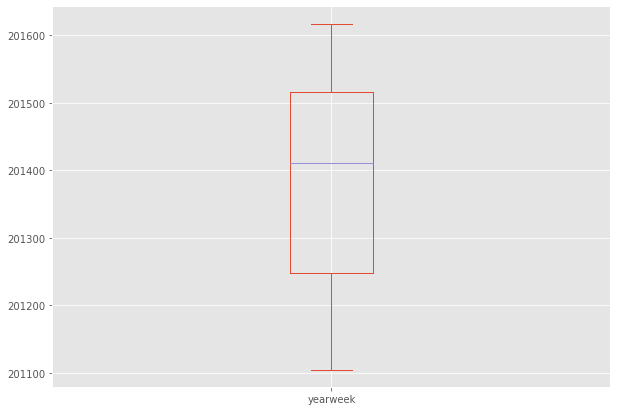

In [169]:
prices.yearweek.plot(kind = 'box')

No outliers in `yearweek`.

##### `sell_price`

<AxesSubplot:>

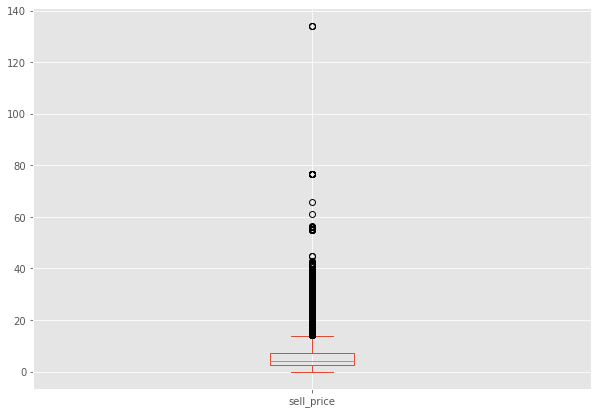

In [171]:
prices.sell_price.plot(kind = 'box')

<AxesSubplot:>

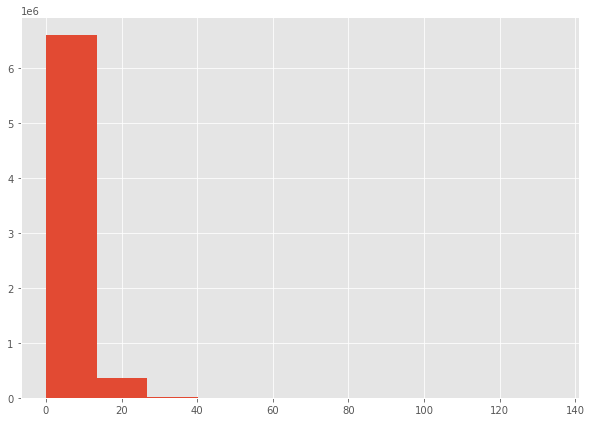

In [172]:
prices.sell_price.hist()

`sell_price` shows quite a bunch of outliers, that may need some treatment. However, these may be related to the range of articles

In [184]:
# checking what are the outlier limits
limits = outliers.outlier_limits(prices, 'sell_price')
limits

(-4.213749999999999, 14.00985)

The outliers are located in negative prices, which means we don't have any because we have seen that there are no negative prices, and also above 14 $. These last ones could be right, as it depends on the kind of articles we sell. The data seems to have a lot of supermarket items, if there are some luxury items, then these outliers may be correct and not an issue.

In [191]:
print(f"There are {len(prices.sell_price[prices.sell_price > limits[1]])} records localised as outliers ({round(len(prices.sell_price[prices.sell_price > limits[1]]) / len(prices.yearweek), 4)}) %")

There are 346068 records localised as outliers (0.0497) %


Which are not many, but they are there. For the time being we won't touch them. 

However, let's see if we can see which are those items that have such a high price, in case the data helps us identify them as luxury or high priced items.

In [173]:
prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,328.00",12.74
1,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,329.00",12.74
2,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,330.00",10.99
3,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,331.00",10.99
4,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,332.00",10.99


In [203]:
expensive_items = prices.loc[prices.sell_price > limits[1], ['item', 'sell_price']]
table = expensive_items.pivot_table(index = 'item', values = 'sell_price', aggfunc = [np.max, np.min, np.mean])
table

,amax,amin,mean
,sell_price,sell_price,sell_price
item,,,
ACCESORIES_1_018,15.80,15.02,15.80
ACCESORIES_1_020,16.86,14.19,16.22
ACCESORIES_1_021,16.19,15.26,15.71
ACCESORIES_1_026,23.90,16.62,23.89
ACCESORIES_1_027,27.62,17.26,26.56
ACCESORIES_1_031,15.33,14.43,14.60
ACCESORIES_1_033,22.42,17.28,21.43
ACCESORIES_1_037,17.93,15.80,17.17


In [237]:
table.loc[table['mean', 'sell_price'] == np.max(table['mean'])[0]].index[0]

'HOME_&_GARDEN_2_178'

In [238]:
max_mean_val = round(np.max(table['mean'])[0], 2)
max_mean_item = table.loc[table['mean', 'sell_price'] == np.max(table['mean'])[0]].index[0]

print(f"Maximum item value is {max_mean_val} for item {max_mean_item}")

Maximum item value is 55.45 for item HOME_&_GARDEN_2_178


In [240]:
max_max_val = round(np.max(table['amax'])[0], 2)
max_max_item = table.loc[table['amax', 'sell_price'] == np.max(table['amax'])[0]].index[0]

print(f"Maximum item value is {max_max_val} for item {max_max_item}")

Maximum item value is 134.15 for item HOME_&_GARDEN_2_406


It seems that there are only some items that can be expensive in mean or in its max price, but usually all the other items don't have that huge price. For the time being, we won't be removing these outliers.

#### `Calendar`

In [241]:
calendar.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
weekday_int,"1,913.00",4.00,2.00,1.00,2.00,4.00,6.00,7.00


<AxesSubplot:>

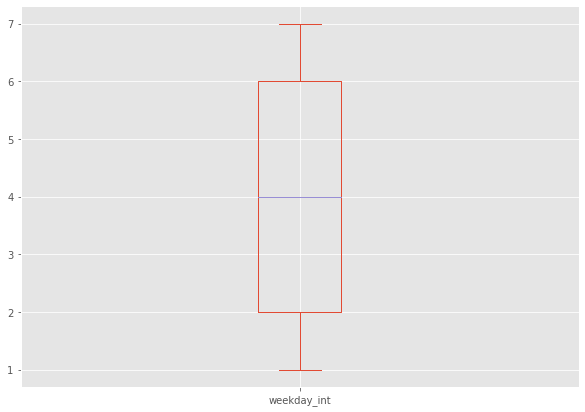

In [242]:
calendar.weekday_int.plot(kind = 'box')

No outliers in calendar numerical variables.

#### 2.1.7. Identification of errors in the data <a class="anchor" id="errors"></a>

#### 2.1.8. Visualization of distributions <a class="anchor" id="data_distributions"></a>

----

Popularity of products

- plot by number of sales by month /week distribution(avg sales in last month...)
- filter by city
- filter by store
- monthly increment of sales (?)

clustering:

- scatter plot... 1v1 (with num variables)
- what caracterises a store? amount of sales they have? Num of products they have...


In [114]:
prices[prices.yearweek.isna()]

,item,category,store_code,yearweek,sell_price
149,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
...,...,...,...,...,...
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20


In [115]:
prices.iloc[148]

item          ACCESORIES_1_001
category            ACCESORIES
store_code               NYC_1
yearweek            201,617.00
sell_price               11.15
Name: 148, dtype: object